In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

import torch 
import torch.nn as nn
import torch.nn.functional as F 
from torchvision import datasets, transforms

In [3]:
BATCH_SIZE = 128 
EPOHCS = 10

In [4]:
if torch.cuda.is_available() :
    DEVICE = torch.device('cuda')
else :
    DEVICE = torch.device('cpu')
print(DEVICE, torch.cuda.get_device_name(),f'torch : {torch.__version__}')

cuda NVIDIA GeForce GTX 1650 torch : 1.12.1+cu113


In [9]:
train_dataset = datasets.CIFAR10(root = '../../data/cifar10',
                                 train = True,
                                 download=True,
                                 transform=transforms.Compose([
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5),
                                                          (0.5, 0.5, 0.5))
                                 ]))
test_dataset = datasets.CIFAR10(root = '../../data/cifar10',
                                 train = False,
                                 download=True,
                                 transform=transforms.Compose([
                                     transforms.RandomHorizontalFlip(),
                                     transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5),
                                                            (0.5, 0.5, 0.5))
                                 ]))
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           shuffle = True,
                                           batch_size = BATCH_SIZE)
train_loader = torch.utils.data.DataLoader(test_dataset,
                                           shuffle = False,
                                           batch_size = BATCH_SIZE)

Files already downloaded and verified
Files already downloaded and verified


In [10]:
for (X_train, y_train) in train_loader :
    print(X_train.size(), y_train.size())
    print(X_train.type(), y_train.type())
    break

torch.Size([128, 3, 32, 32]) torch.Size([128])
torch.FloatTensor torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

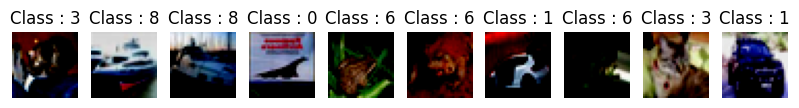

In [11]:
pltsize = 1
plt.figure(figsize = (pltsize * 10, pltsize))
for i in range(10) :
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title(f'Class : {y_train[i].item()}')
plt.show()

In [ ]:
class BasicBlock(nn.Module) :
    def __init__(self, in_planes, planes, stride = 1) :
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_planes, planes,
                               kernel_size=3,
                               padding = 1,
                               stride = stride,
                               bias = False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes,
                               kernel_size=3,
                               padding = 1,
                               stride = 1,
                               bias = False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.shortcut = nn.Sequential() 

        if in_planes != planes or stride != 1 :
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, planes,
                          kernel_size= 1,
                          stride = stride,
                          bias = False),
                nn.BatchNorm2d(planes)
            )

    def forward(self, x) :
        out = self.bn1(self.conv1(x))
        out = self.bn2(self.conv2(out))